In [1]:
#Q.1
# Read a word from user and print all meanings of it.
# Read a word from user and print all noun meanings

In [2]:
#A)Read a word from user and print all meanings of it.

import nltk
from nltk.corpus import wordnet
word = input("Enter a word: ")
synsets = wordnet.synsets(word)
for synset in synsets:
    if synset.pos() == 'n':
        print(synset.definition())
    


an adult person who is male (as opposed to a woman)
someone who serves in the armed forces; a member of a military force
the generic use of the word to refer to any human being
any living or extinct member of the family Hominidae characterized by superior intelligence, articulate speech, and erect carriage
a male subordinate
an adult male person who has a manly character (virile and courageous competent)
a manservant who acts as a personal attendant to his employer
a male person who plays a significant role (husband or lover or boyfriend) in the life of a particular woman
one of the British Isles in the Irish Sea
game equipment consisting of an object used in playing certain board games
all of the living human inhabitants of the earth


In [3]:
#B)Read a word from user and print all noun meanings
word = input('Enter yhe word')
print('Meaning of word', word, 'are')

for word in wordnet.synsets(word, pos= 'n'):
    print(word.name()+ "-->"  + word.definition())

Meaning of word ma are
ma.n.01-->informal terms for a mother
master_of_arts.n.01-->a master's degree in arts and sciences
milliampere.n.01-->one thousandth of an ampere
massachusetts.n.01-->a state in New England; one of the original 13 colonies


Q2.

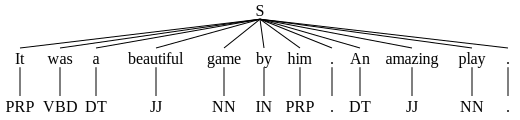

In [6]:
# # Open the wikipedia page https://en.wikipedia.org/wiki/Maharashtra
# 1. Apply chuncking and show the chunks of type <VBD><DT>
### Import he neccessary 
from nltk.tokenize import word_tokenize
from nltk import pos_tag,RegexpParser

grammar  = "NP:{<VBT><DT>}"
chunk_parser = RegexpParser(grammar)

sent  =  "It was a beautiful game by him. An amazing play."

tags   =  pos_tag(word_tokenize(sent))
tree =  chunk_parser.parse(tags)
tree


In [7]:
# 2. Find all the named entities present in article
import spacy

icc_text = '''The Chairman heads the board of directors and on June 26, 2014, Narayanaswami Srinivasan, the former president of BCCI, was announced as the first chairman of the council.[6] The role of ICC president became a largely honorary position after the establishment of the chairman role and other changes made to the ICC constitution in 2014. It has been claimed that the 2014 changes have handed control to the 'Big Three' nations of England, India and Australia.[7] The last ICC president was Zaheer Abbas,[8] who was appointed in June 2015 following the resignation of Mustafa Kamal in April 2015. When the post of ICC president was abolished in April 2016, Shashank Manohar, who replaced Srinivasan in October 2015, became the first independent elected chairman of the ICC.[9]

'''
nlp  = spacy.load('en_core_web_sm')
sent_icc = nlp(icc_text)


for  ent in sent_icc.ents:
    if ent.label_ == 'PERSON':print(ent.text)

Narayanaswami Srinivasan
Zaheer Abbas,[8
Mustafa Kamal
Shashank Manohar


In [8]:
from spacy import displacy
displacy.render(sent_icc, style="ent", jupyter=True)

In [33]:
# 3. Access all the verbs and apply the porter stemmer and lancaster stemmer
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk import pos_tag
from nltk.tokenize import word_tokenize


ps = PorterStemmer()
Ls = LancasterStemmer()

text = '''The Chairman heads the board of directors and on June 26, 2014, Narayanaswami Srinivasan, the former president of BCCI, was announced as the first chairman of the council.[6] The role of ICC president became a largely honorary position after the establishment of the chairman role and other changes made to the ICC constitution in 2014. It has been claimed that the 2014 changes have handed control to the 'Big Three' nations of England, India and Australia.[7] The last ICC president was Zaheer Abbas,[8] who was appointed in June 2015 following the resignation of Mustafa Kamal in April 2015. When the post of ICC president was abolished in April 2016, Shashank Manohar, who replaced Srinivasan in October 2015, became the first independent elected chairman of the ICC.[9]

'''
tags = pos_tag(word_tokenize(text))


## Print only noun
verbs = [word for word, pos in tags if 'VB' in pos and word.isalnum()]
#print(verbs)

# applying the porter stemmer.
from nltk.tokenize import word_tokenize

print("********** Portate Stammer *************")
lst = []
for word in verbs:
    print(word , '-->', ps.stem(word))


print("********** lancaster Stammer *************")
lst = []
for word in verbs:
    print(word , '-->', Ls.stem(word))




********** Portate Stammer *************
heads --> head
was --> wa
announced --> announc
became --> becam
made --> made
has --> ha
been --> been
claimed --> claim
have --> have
handed --> hand
was --> wa
was --> wa
appointed --> appoint
following --> follow
was --> wa
abolished --> abolish
replaced --> replac
became --> becam
elected --> elect
********** lancaster Stammer *************
heads --> head
was --> was
announced --> annount
became --> becam
made --> mad
has --> has
been --> been
claimed --> claim
have --> hav
handed --> hand
was --> was
was --> was
appointed --> appoint
following --> follow
was --> was
abolished --> abol
replaced --> replac
became --> becam
elected --> elect


In [36]:
import nltk
nltk.download('verbnet')

[nltk_data] Downloading package verbnet to C:\Users\Administrator.DAI-
[nltk_data]     PC2\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\verbnet.zip.


True

In [45]:
# 4. Access all the verbs in past tense and lemmatize them. Show only unique verbs.

from nltk.tokenize import word_tokenize
from nltk.corpus import verbnet
from nltk.stem import WordNetLemmatizer

def find_past_tense_verbs(text):
  
  words = word_tokenize(text.lower())
  unique_past_verbs = set()
  tags = pos_tag(word_tokenize(text))
  verbs = [word for word, pos in tags if 'VB' in pos and word.isalnum()]
  # Create a lemmatizer
  lemmatizer = WordNetLemmatizer()

  for word in verbs:
    if word.endswith('ed'):
      print(word , '-->', lemmatizer.lemmatize(word))


past_verbs = find_past_tense_verbs(text)




announced --> announced
claimed --> claimed
handed --> handed
appointed --> appointed
abolished --> abolished
replaced --> replaced
elected --> elected


In [59]:
# 5. Read only the adjectives from the text and find their synonyms.

tags = pos_tag(word_tokenize(text))


## Print only noun
ajective = [word for word, pos in tags if 'JJ' in pos and word.isalnum()]
print(ajective)

for word in ajective:
    for word in wordnet.synsets(word):
        print(f"{word} '-->' {word.lemmas()[0].name()}")


['former', 'first', 'honorary', 'other', 'last', 'first', 'independent']
Synset('former.n.01') '-->' former
Synset('former.a.01') '-->' former
Synset('erstwhile.s.01') '-->' erstwhile
Synset('former.s.03') '-->' former
Synset('early.s.03') '-->' early
Synset('first.n.01') '-->' first
Synset('first.n.02') '-->' first
Synset('beginning.n.02') '-->' beginning
Synset('first_base.n.02') '-->' first_base
Synset('first.n.05') '-->' first
Synset('first_gear.n.01') '-->' first_gear
Synset('first.a.01') '-->' first
Synset('first.s.02') '-->' first
Synset('inaugural.s.02') '-->' inaugural
Synset('beginning.s.01') '-->' beginning
Synset('first.s.05') '-->' first
Synset('first.a.06') '-->' first
Synset('first.r.01') '-->' first
Synset('first.r.02') '-->' first
Synset('first.r.03') '-->' first
Synset('foremost.r.01') '-->' foremost
Synset('honorary.s.01') '-->' honorary
Synset('other.a.01') '-->' other
Synset('other.s.02') '-->' other
Synset('early.s.03') '-->' early
Synset('other.s.04') '-->' other

In [61]:
# 6. Read all the verbs and print their antonyms.
tags = pos_tag(word_tokenize(text))


## Print only noun
verb = [word for word, pos in tags if 'VB' in pos and word.isalnum()]
print(ajective)

for word in ajective:
    for word in wordnet.synsets(word):
        print(f"{word} '-->' {word.lemmas()[0].name()}")

['former', 'first', 'honorary', 'other', 'last', 'first', 'independent']
Synset('former.n.01') '-->' former
Synset('former.a.01') '-->' former
Synset('erstwhile.s.01') '-->' erstwhile
Synset('former.s.03') '-->' former
Synset('early.s.03') '-->' early
Synset('first.n.01') '-->' first
Synset('first.n.02') '-->' first
Synset('beginning.n.02') '-->' beginning
Synset('first_base.n.02') '-->' first_base
Synset('first.n.05') '-->' first
Synset('first_gear.n.01') '-->' first_gear
Synset('first.a.01') '-->' first
Synset('first.s.02') '-->' first
Synset('inaugural.s.02') '-->' inaugural
Synset('beginning.s.01') '-->' beginning
Synset('first.s.05') '-->' first
Synset('first.a.06') '-->' first
Synset('first.r.01') '-->' first
Synset('first.r.02') '-->' first
Synset('first.r.03') '-->' first
Synset('foremost.r.01') '-->' foremost
Synset('honorary.s.01') '-->' honorary
Synset('other.a.01') '-->' other
Synset('other.s.02') '-->' other
Synset('early.s.03') '-->' early
Synset('other.s.04') '-->' other

In [64]:
# 7. Print all the entities marked as DATE and TIME in the data
for  ent in sent_icc.ents:
    if ent.label_ == 'DATE':
        print(ent.text)



June 26, 2014
2014
2014
June 2015
April 2015
April 2016
October 2015


In [65]:
# 8. Print all the named of locations present in the article.

for  ent in sent_icc.ents:
    if ent.label_ == 'GPE':
        print(ent.text)

England
India
